# SLU09: Model Selection & Overfitting -- Examples
---
<a id='top'></a>

## 1. Model evaluation
#### a. [Train-test split](#traintest)
#### b. [Train-val-test split](#val)
#### c. [Cross validation](#crossval)
## 2. Regularized Linear Regression
#### a. [Ridge ($L_2$)](#ridge)
#### b. [Lasso ($L_1$)](#lasso)
#### c. [Elastic Net ($L_1 + L_2$)](#elastic)

# 1. Model evaluation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
# Create the DataFrame with the data
df = pd.read_csv("data/beer.csv")

# Create a DataFrame with the features (X) and labels (y)
X = df.drop(["IsIPA"], axis=1)
y = df["IsIPA"]

In [3]:
print("Number of entries: ", X.shape[0])

Number of entries:  1000


<a id='traintest'></a> [Return to top](#top)
## Create a training and a test set

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Using 20 % of the data as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
print("Number of training entries: ", X_train.shape[0])
print("Number of test entries: ", X_test.shape[0])

Number of training entries:  800
Number of test entries:  200


<a id='val'></a> [Return to top](#top)
## Create a training, test and validation set

In [7]:
# Using 20 % as test set and 20 % as validation set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25)

In [8]:
print("Number of training entries: ", X_train.shape[0])
print("Number of validation entries: ", X_val.shape[0])
print("Number of test entries: ", X_test.shape[0])

Number of training entries:  600
Number of validation entries:  200
Number of test entries:  200


<a id='crossval'></a> [Return to top](#top)
## Use cross-validation (using a given classifier)

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5)

In [11]:
print("Mean of scores: {:.3f}".format(scores.mean()))
print("Variance of scores: {:.3f}".format(scores.var()))

Mean of scores: 0.916
Variance of scores: 0.001


# 2. Regularized Linear Regression

In [12]:
from utils import create_dataset, expand_dataset

In [13]:
# Create dummy dataset
data = create_dataset()
original_data = data.copy()
data.head(2)

,x,y
0,0.000000,0.085618
1,0.017453,0.254818


<a id='ridge'></a> [Return to top](#top)
## Ridge Regression

#### Loss function (add $L_2$ norm to Mean Squared Error):

$$J = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 + \lambda_2 \sum_{k=1}^K \beta_k^2$$


In [14]:
data = expand_dataset(original_data, 10)

X = data.drop('y', axis=1)
y = data['y']

In [15]:
data.head(2)

,x,y,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9
0,0.000000,0.085618,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.017453,0.254818,0.000305,0.000005,9.279177e-08,1.619522e-09,2.826599e-11,4.933346e-13,8.610313e-15,1.502783e-16


In [16]:
from sklearn.linear_model import Ridge

In [17]:
ridge = Ridge(normalize=True, alpha=0.0001, random_state=10)
ridge.fit(X, y)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=10, solver='auto', tol=0.001)

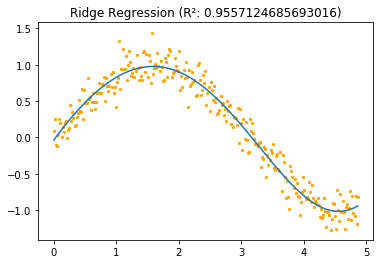

In [18]:
plt.scatter(X['x'], data['y'], c='orange', s=5)
plt.plot(X['x'], ridge.predict(X))
plt.title('Ridge Regression (R²: {})'.format(ridge.score(X, y)));

<a id='lasso'></a> [Return to top](#top)
## Lasso Regression

#### Loss function (add $L_1$ norm to Mean Squared Error):

$$J = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 + \lambda_1 \sum_{k=1}^K \left|\beta_k\right|$$


In [19]:
from sklearn.linear_model import Lasso

In [20]:
lasso = Lasso(normalize=True, alpha=0.0002, random_state=10, max_iter=4000)
lasso.fit(X, y)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=4000,
      normalize=True, positive=False, precompute=False, random_state=10,
      selection='cyclic', tol=0.0001, warm_start=False)

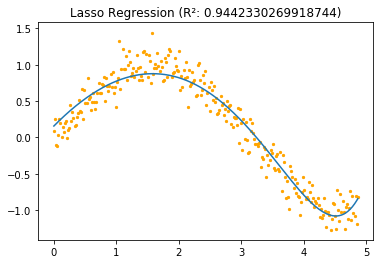

In [21]:
plt.scatter(X['x'], data['y'], c='orange', s=5)
plt.plot(X['x'], lasso.predict(X))
plt.title('Lasso Regression (R²: {})'.format(lasso.score(X, y)));

<a id='elastic'></a> [Return to top](#top)
## Elastic Net Regression

#### Loss function (add $L_1$ and $L_2$ norms to Mean Squared Error):

$$J = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 + \lambda_1 \sum_{k=1}^K \left|\beta_k\right| + \lambda_2 \sum_{k=1}^K \beta_k^2$$


In [22]:
from sklearn.linear_model import ElasticNet

In [23]:
en = ElasticNet(normalize=True, alpha=0.00001, l1_ratio=0.5, random_state=10, max_iter=5000)
en.fit(X, y)

ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=5000, normalize=True, positive=False, precompute=False,
           random_state=10, selection='cyclic', tol=0.0001, warm_start=False)

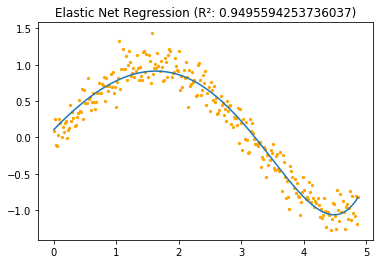

In [24]:
plt.scatter(X['x'], data['y'], c='orange', s=5)
plt.plot(X['x'], en.predict(X))
plt.title('Elastic Net Regression (R²: {})'.format(en.score(X, y)));